#Subject: Signal and Image Processing
#Topic: Sobel operator


##Aim:

a. Apply Sobel’s mask on the given test image to obtain component of gradient |𝑔𝑥|,|𝑔𝑦|𝑎𝑛𝑑

|𝑔𝑥+𝑔𝑦|

b. Apply 5x5 averaging filter on the test image and then implement the sequence in step a.

c. Summarize your observations after comparing the results obtained in step a and b

In [1]:
#butterworth - edgedetection
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2

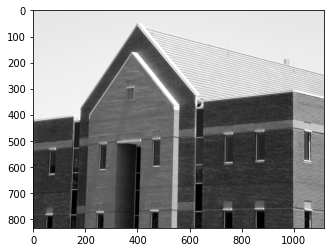

In [2]:
img = cv2.imread("/content/Fig1016(a)(building_original).tif",0)
#cv2.sobel , scipy - sobel func
plt.imshow(img,cmap='gray',vmin=0, vmax=255)
m,n = img.shape

In [3]:
img.shape

(834, 1114)

##Without using in-built function to convolve filter

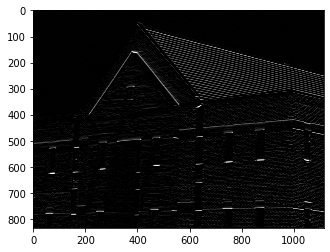

In [4]:
#horizontal edges fx
img_h=np.zeros([m,n])
mask= np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
m,n = img.shape
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
        img_h[i,j]=temp
plt.imshow(img_h,cmap='gray',vmin=0, vmax=255)

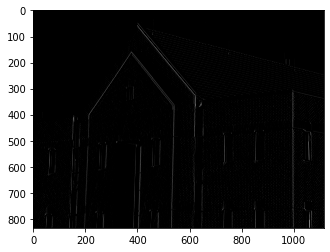

In [7]:
#vertical edges fx
mask_v= np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
img_v=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-1,j-1]*mask_v[0,0]+img[i-1,j]*mask_v[0,1]+img[i-1,j+1]*mask_v[0,2]+img[i,j-1]*mask_v[1,0]+img[i,j]*mask_v[1,1]+img[i,j+1]*mask_v[1,2]+img[i+1,j-1]*mask_v[2,0]+img[i+1,j]*mask_v[2,1]+img[i+1,j+1]*mask_v[2,2]
      
        img_v[i,j]=temp

plt.imshow(img_v, cmap="gray", vmin=0)

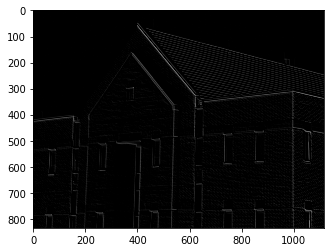

In [9]:
#diagonal edges fx 1
mask_d= np.array([[0,1,2], [-1,0,1], [-2,-1,0]])
img_d=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-1,j-1]*mask_d[0,0]+img[i-1,j]*mask_d[0,1]+img[i-1,j+1]*mask_d[0,2]+img[i,j-1]*mask_d[1,0]+img[i,j]*mask_d[1,1]+img[i,j+1]*mask_d[1,2]+img[i+1,j-1]*mask_d[2,0]+img[i+1,j]*mask_d[2,1]+img[i+1,j+1]*mask_d[2,2]
      
        img_d[i,j]=temp

plt.imshow(img_d, cmap="gray", vmin=0)
     

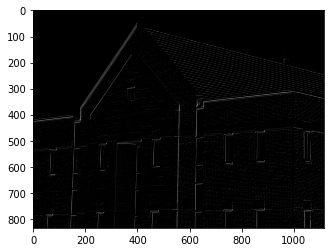

In [12]:
# diagonal edges fx 2
mask_d2= np.array([[2,1,0], [1,0,-1], [0,-1,-2]])
img_d2=np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        temp= img[i-1,j-1]*mask_d2[0,0]+img[i-1,j]*mask_d2[0,1]+img[i-1,j+1]*mask_d2[0,2]+img[i,j-1]*mask_d2[1,0]+img[i,j]*mask_d2[1,1]+img[i,j+1]*mask_d2[1,2]+img[i+1,j-1]*mask_d2[2,0]+img[i+1,j]*mask_d2[2,1]+img[i+1,j+1]*mask_d2[2,2]
      
        img_d2[i,j]=temp

plt.imshow(img_d2, cmap="gray", vmin=0)
     

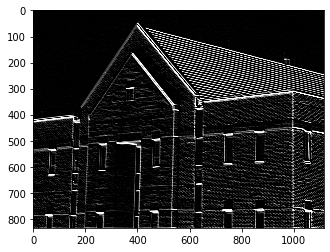

In [24]:
img_hvd= img_h+img_v+img_d+img_d2
plt.imshow(img_hvd, cmap="gray", vmin=0, vmax=255)

##Using Inbuilt function for convolving mask on image - sobel

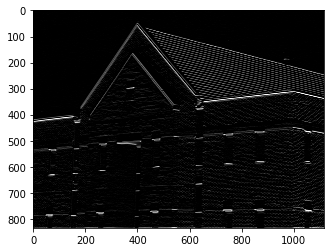

In [18]:
#using sobel horizontal
sobel_h = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
img_hs= signal.convolve(img,sobel_h,mode='same')
plt.imshow(img_h,cmap="gray", vmin=0, vmax=255)

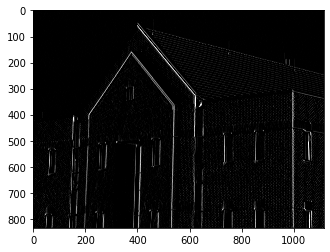

In [19]:
#using sobel vertical
sobel_v= np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
img_vs= signal.convolve(img,sobel_v,mode='same')
plt.imshow(img_v,cmap="gray", vmin=0, vmax=255)

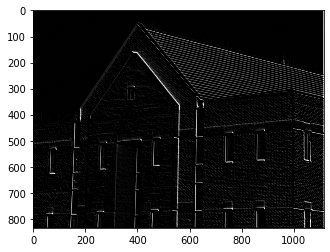

In [20]:
#using sobel diagonal 1
sobel_d= np.array([[0,1,2], [-1,0,1], [-2,-1,0]])
img_ds= signal.convolve(img,sobel_d,mode='same')
plt.imshow(img_ds, cmap="gray", vmin=0, vmax=255)

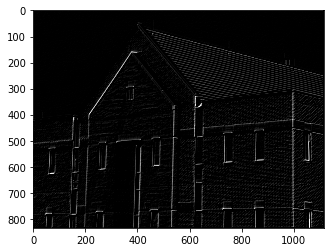

In [21]:
#using sobel diagonal 2
sobel_d2= np.array([[2,1,0], [1,0,-1], [0,-1,-2]])
img_ds2= signal.convolve(img,sobel_d2,mode='same')
plt.imshow(img_ds2, cmap="gray", vmin=0, vmax=255)

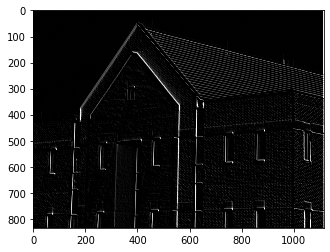

In [23]:
img_hvds= img_hs+img_vs+img_ds+img_ds2
plt.imshow(img_hvds, cmap="gray", vmin=0, vmax=255)

In conclusion, edge detection is an essential process in image processing that helps in identifying boundaries between objects or regions in an image. It is useful in various fields, including computer vision, medical imaging, and robotics.

Sobel edge detection is a popular method for identifying edges in an image.Its basic working involves convolving the mask across the whole image. It involves convolving the image with a kernel or filter to compute the gradient of the image intensity at each pixel. The Sobel filter is a simple and effective way to detect edges and is widely used in image processing. The Sobel inbuilt function is available in most image processing libraries(cv2, scipy for instance) and can be used to perform edge detection quickly.

However, edge detection can also be done without using the Sobel inbuilt function. In summary, edge detection is an important process in image processing that can be performed using various methods, including the Sobel inbuilt function. However, other methods can also be used, and the choice of method depends on the specific application requirements.